<class 'numpy.ndarray'>
Degree 1: MSE = 0.17126666109542008, R2 = -0.8899598387352736
Degree 2: MSE = 0.12394481714009953, R2 = -0.3677543843962967
Degree 3: MSE = 0.1239606888676832, R2 = -0.36792953189734945
Degree 4: MSE = 0.09754234390825392, R2 = -0.07639812315833128
Degree 5: MSE = 0.0975162602830124, R2 = -0.07611028544467602
Degree 6: MSE = 0.0883133180701351, R2 = 0.025445913930572828
Degree 7: MSE = 0.08823557741071268, R2 = 0.0263037967386186
Degree 8: MSE = 0.08013017939580074, R2 = 0.11574838932405684
Degree 9: MSE = 0.08007644751275306, R2 = 0.1163413307661928
Degree 10: MSE = 0.07746586837142333, R2 = 0.14514956291946823
Degree 11: MSE = 0.07740680754252019, R2 = 0.1458013102820629
Degree 12: MSE = 0.07656869914734155, R2 = 0.1550499941605441
Degree 13: MSE = 0.0765801611869583, R2 = 0.15492350839613966
Degree 14: MSE = 0.0740921592006665, R2 = 0.1823790785737195
Degree 15: MSE = 0.07408937720822176, R2 = 0.18240977838393713


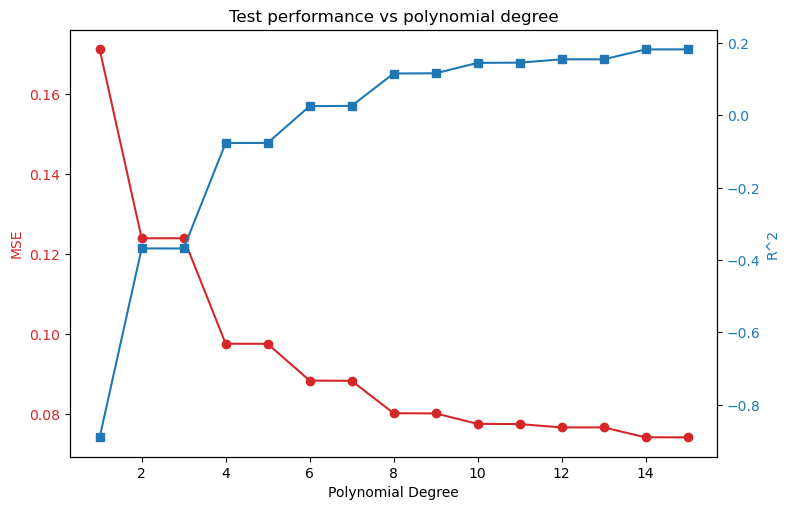

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from OLS import OLS_parameters 
from polynomial_features import polynomial_features

def f(x): 
    return 1/(1+25*x**2)

x = np.linspace(-1,1,500)
y = f(x)

print(type(y))

polymax = 15
mse_list = []
r2_list = []

for i in range(1, polymax+1):
    
    X = polynomial_features(x, i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6114)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    beta = OLS_parameters(X_train_scaled, y_train)

    mse = mean_squared_error(y_test, X_test_scaled @ beta)
    
    r2 = r2_score(y_test, X_test_scaled @ beta)

    mse_list.append(mse)
    r2_list.append(r2)
    
    print(f"Degree {i}: MSE = {mse}, R2 = {r2}")


# --- Plotting ---
degrees = np.arange(1, polymax+1)

fig, ax1 = plt.subplots(figsize=(8,5))

# MSE on left axis
color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('MSE', color=color)
ax1.plot(degrees, mse_list, 'o-', color=color, label='MSE')
ax1.tick_params(axis='y', labelcolor=color)
# ax1.set_yscale('log')   # log scale useful for error

# R^2 on right axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R^2', color=color)
ax2.plot(degrees, r2_list, 's-', color=color, label='R^2')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Test performance vs polynomial degree")
plt.show()



In [20]:
# Import libraries and functions:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Import our own implementations
import importlib, OLS, prepare_data, polynomial_features
importlib.reload(OLS)
importlib.reload(prepare_data)
importlib.reload(polynomial_features)

from prepare_data import prepare_data
from polynomial_features import polynomial_features
from OLS import OLS_parameters

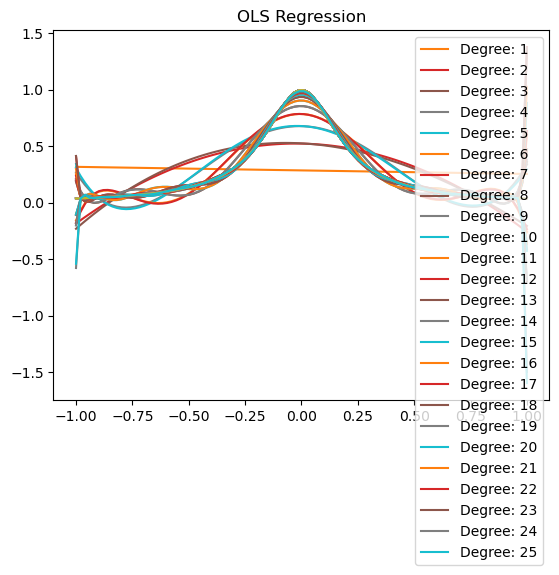

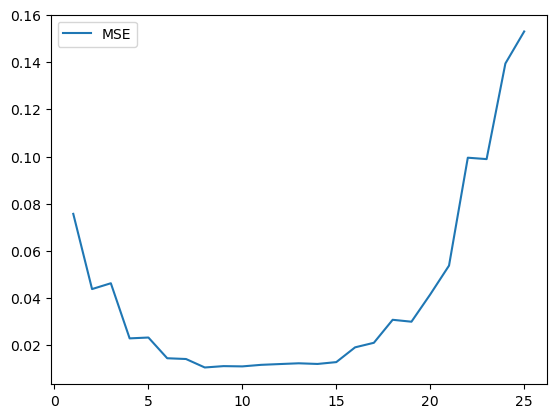

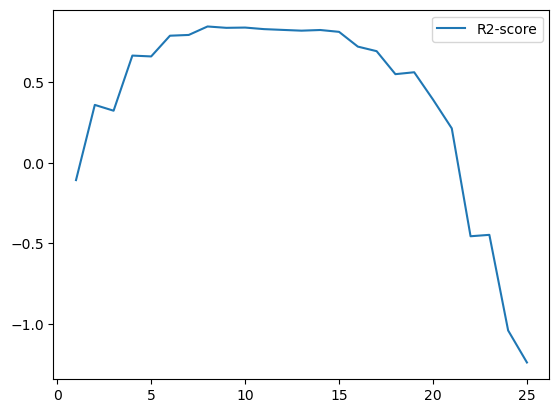

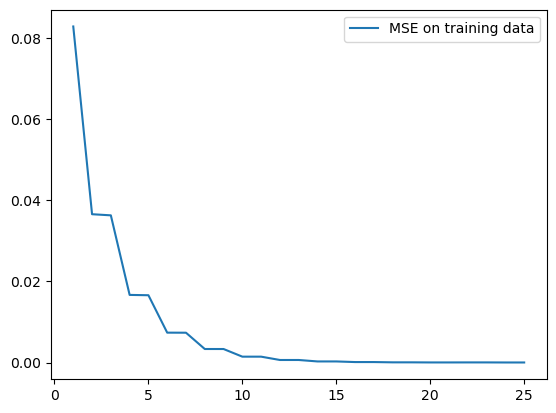

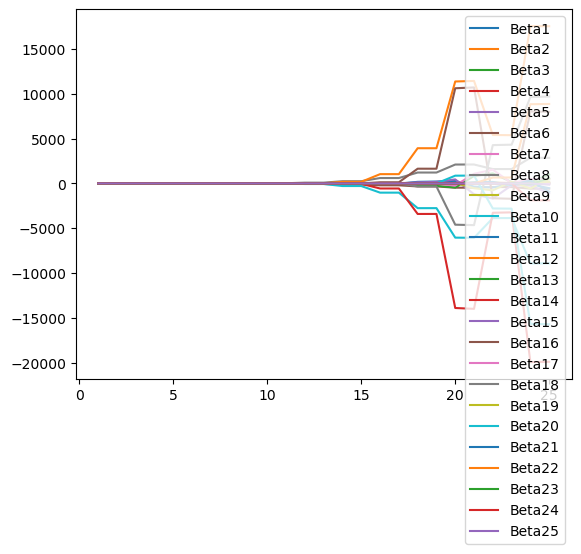

In [39]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Define maximal polynomial degree
deg_max = 25

# Define empty lists/arrays for storing MSEs, R2-scores and parameters
MSE=[]
MSE_train=[]
R2_score= []
parameters = np.zeros((deg_max, deg_max))

# Loop over degrees
for p in range(1, deg_max+1):
    # Feature matrix for plotting/predicting
    X_plot = polynomial_features(x, p, intercept=False)
    # Feature matrix for training
    X_train = polynomial_features(x_train, p, intercept=False)
    # Feature matrix for testing
    X_test  = polynomial_features(x_test, p, intercept=False)

    # Scaling data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s  = scaler.transform(X_test)
    X_plot_s  = scaler.transform(X_plot)
    
    # Compute closed-form OLS parameters
    beta = OLS_parameters(X_train_s, y_train)
    
    # Store parameters in array
    for i in range (len(beta)):
        parameters[p-1, i] = beta[i]
    
    # Compute y_offset (because Intercept = False)
    y_offset = np.mean(y_train)
    # Add offset to prediction, predict on test data
    y_pred = X_test_s @ beta + y_offset
    y_pred_train = X_train_s @ beta + y_offset
    # Add MSE to list, predicted on test data
    MSE.append(mean_squared_error(y_test, y_pred))
    MSE_train.append(mean_squared_error(y_train, y_pred_train))
    # Add R2-score to list
    R2_score.append(r2_score(y_true=y_test, y_pred=y_pred))
    
    plt.plot(x, y)
    plt.plot(x, X_plot_s@beta + y_offset, label=f"Degree: {p}")
plt.title("OLS Regression")
plt.legend()
plt.show()   
degrees = np.arange(1, deg_max+1)
plt.plot(degrees, MSE, label="MSE")
plt.legend()
plt.show()
plt.plot(degrees, R2_score, label="R2-score")
plt.legend()
plt.show()
plt.plot(degrees, MSE_train, label="MSE on training data")
plt.legend()
plt.show()
# Plotting parameters
for i in range(deg_max):
    plt.plot(degrees, parameters[:, i], label=f"Beta{i+1}")
plt.legend()
plt.show()

